# Data Analysis for August 2019 CPI story on SBA disaster loans

Data obtained via FOIA request from the United States Small Businses Administration. 

## Import libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import us
plt.style.use("ggplot")

## Read in data

In [2]:
# Approved loans
df_approvals = pd.read_csv("data/sba_disaster_loan_approvals.csv.gz",dtype={
    "FEMA_DECL": str,
    "ZIP": str
})
print(df_approvals.shape)
df_approvals.head()

(609273, 11)


C:\Users\zach.goldstein\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FY,SBA_PHYS_NBR,SBA_EIDL_NBR,FEMA_DECL,SBA_DECL,CITY,STATE,ZIP,COUNTY,LOAN_TYPE,ORIGINAL_APPROVAL_AMOUNT
0,2004,,R304,,R304,BEAUMONT,TX,77707,NaN,B,88000
1,2004,,R304,,R304,BLUE SPRINGS,MO,64014,NaN,B,40000
2,2004,,R304,,R304,BOULDER,CO,80304,NaN,B,54500
3,2003,,R203,,R203,PALM BAY,FL,32907,NaN,B,79400
4,2003,,R203,,R203,FRANKLIN,OH,45005,NaN,B,249600


In [3]:
# Withdrawn loans
df_withdrawals = pd.read_csv("data/sba_disaster_loan_withdrawals.csv.gz",dtype={
    "WD_CODES": str,
    "WD_CODES2": str,
    "ZIP": str
})
print(df_withdrawals.shape)
df_withdrawals.head()

(283457, 16)


C:\Users\zach.goldstein\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,2,3,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FY,SBA_PHYS_NBR,SBA_EIDL_NBR,FEMA_DECL,SBA_DECL,CITY,STATE,ZIP,COUNTY,LOAN_TYPE,TOT_ORIG_VER_LOSS,TOT_ORIG_VER_LOSS_RE,TOT_ORIG_VER_LOSS_CONTENT,WD_CODES,WD_CODES2,Unnamed: 15
0,2001,,9K98,,9K98,CHARLESTON,SC,29412,CHARLESTON,EIDL,0,0.0,0.0,51,NaN,NaN
1,2001,,9K98,,9K98,EDISTO BEACH,SC,29438,COLLETON,EIDL,0,0.0,0.0,56,NaN,NaN
2,2003,,9R32,,9R32,KERNVILLE,CA,93238,TULARE,EIDL,0,0.0,0.0,59,NaN,NaN
3,2003,,9R57,,9R57,JEAN LA FITTE,LA,70067,JEFFERSON,EIDL,0,0.0,0.0,60,NaN,NaN
4,2003,,9R57,,9R57,THERIOT,LA,70397,TERREBONNE,EIDL,0,0.0,0.0,59,NaN,NaN


In [4]:
# Declined loans
df_declines = pd.read_csv("data/sba_disaster_loan_declines.csv.gz",dtype={
    "DECL_CODES": str,
    "DECL_CODES2": str,
    "DECL_CODES3": str,
    "DECL_CODES4": str,
    "FEMA_DECL": str,
    "ZIP": str
})
print(df_declines.shape)
df_declines.head()

(859760, 17)


,FY,SBA_PHYS_NBR,SBA_EIDL_NBR,FEMA_DECL,SBA_DECL,CITY,STATE,ZIP,COUNTY,LOAN_TYPE,TOT_ORIG_VER_LOSS,TOT_ORIG_VER_LOSS_RE,TOT_ORIG_VER_LOSS_CONTENT,DECL_CODES,DECL_CODES2,DECL_CODES3,DECL_CODES4
0,2004,,R303,,R303,AUGUSTA,KS,67010,NaN,B,0,0.0,0.0,31,27,NaN,NaN
1,2002,,T401,,T401,KIRKLAND,WA,98034,NaN,B,0,0.0,0.0,43,NaN,NaN,NaN
2,2004,,R104,,R104,SARATOGA,NY,12866,NaN,B,0,0.0,0.0,42,NaN,NaN,NaN
3,2004,,R104,,R104,SPENCER,WV,25276,NaN,B,0,0.0,0.0,28,27,NaN,NaN
4,2004,,R104,,R104,COEYMANS HOLLOW,NY,12046,NaN,B,0,0.0,0.0,28,27,25,NaN


In [5]:
# Checking all column names
print(df_approvals.columns)
print(df_withdrawals.columns)
print(df_declines.columns)

Index(['FY', 'SBA_PHYS_NBR', 'SBA_EIDL_NBR', 'FEMA_DECL', 'SBA_DECL', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'LOAN_TYPE', 'ORIGINAL_APPROVAL_AMOUNT'],
      dtype='object')
Index(['FY', 'SBA_PHYS_NBR', 'SBA_EIDL_NBR', 'FEMA_DECL', 'SBA_DECL', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'LOAN_TYPE', 'TOT_ORIG_VER_LOSS',
       'TOT_ORIG_VER_LOSS_RE', 'TOT_ORIG_VER_LOSS_CONTENT', 'WD_CODES',
       'WD_CODES2', 'Unnamed: 15'],
      dtype='object')
Index(['FY', 'SBA_PHYS_NBR', 'SBA_EIDL_NBR', 'FEMA_DECL', 'SBA_DECL', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'LOAN_TYPE', 'TOT_ORIG_VER_LOSS',
       'TOT_ORIG_VER_LOSS_RE', 'TOT_ORIG_VER_LOSS_CONTENT', 'DECL_CODES',
       'DECL_CODES2', 'DECL_CODES3', 'DECL_CODES4'],
      dtype='object')


## Data cleaning

In [6]:
# Remove whitespace from decline code fields
df_declines[['DECL_CODES','DECL_CODES2','DECL_CODES3','DECL_CODES4','FEMA_DECL']] = df_declines[['DECL_CODES','DECL_CODES2','DECL_CODES3','DECL_CODES4','FEMA_DECL']].apply(lambda s: s.str.strip())

In [7]:
# Remove whitespace from ends of state codes
df_approvals[['STATE']] = df_approvals[['STATE']].apply(lambda s: s.str.strip())
df_withdrawals[['STATE']] = df_withdrawals[['STATE']].apply(lambda s: s.str.strip())
df_declines[['STATE']] = df_declines[['STATE']].apply(lambda s: s.str.strip())

In [8]:
# Data cleaning where data was shifted
df_approvals.loc[df_approvals['ORIGINAL_APPROVAL_AMOUNT']=="H","ZIP"] = df_approvals.loc[df_approvals['ORIGINAL_APPROVAL_AMOUNT']=="H","COUNTY"]
df_approvals.loc[df_approvals['ORIGINAL_APPROVAL_AMOUNT']=="H","COUNTY"] = df_approvals.loc[df_approvals['ORIGINAL_APPROVAL_AMOUNT']=="H","LOAN_TYPE"]
df_approvals.loc[df_approvals['ORIGINAL_APPROVAL_AMOUNT']=="H","LOAN_TYPE"] = df_approvals.loc[df_approvals['ORIGINAL_APPROVAL_AMOUNT']=="H","ORIGINAL_APPROVAL_AMOUNT"]

df_approvals.loc[df_approvals['ORIGINAL_APPROVAL_AMOUNT']=="B","ZIP"] = df_approvals.loc[df_approvals['ORIGINAL_APPROVAL_AMOUNT']=="B","COUNTY"]
df_approvals.loc[df_approvals['ORIGINAL_APPROVAL_AMOUNT']=="B","COUNTY"] = df_approvals.loc[df_approvals['ORIGINAL_APPROVAL_AMOUNT']=="B","LOAN_TYPE"]
df_approvals.loc[df_approvals['ORIGINAL_APPROVAL_AMOUNT']=="B","LOAN_TYPE"] = df_approvals.loc[df_approvals['ORIGINAL_APPROVAL_AMOUNT']=="B","ORIGINAL_APPROVAL_AMOUNT"]

## Exploring interesting reasons for withdrawals/declines

### What do the codes mean?

In [9]:
with pd.option_context('display.max_colwidth', -1):
    display(pd.read_csv("sba_disaster_loan_codes.csv"))

,D/W,Code,Description
0,D,20,Lack of repayment ability - Applicant's income below minimum income level for the family size
1,D,21,Lack of repayment ability
2,D,22,Lack of ability to repay a loan within a maximum seven year term
3,D,23,Inadequate cash flow to repay disaster loan and meet other obligations
4,D,24,Excessive amount of debt relative to net worth
5,D,25,Inadequate working capital even if SBA could approve a loan
6,D,26,Unsatisfactory history on an existing or previous SBA loan
7,D,27,Unsatisfactory history on a Federal obligation
8,D,28,Unsatisfactory credit history
9,D,29,Unsatisfactory debt payment history


In [10]:
# Returns a subset of "df" where any of the code columns are equal to value "code"
def filter_any_code_col(code, df):
    return df[(df['DECL_CODES']==code)|
              (df['DECL_CODES2']==code)|
              (df['DECL_CODES3']==code)|
             (df['DECL_CODES4']==code)].copy()

### Character reasons

In [11]:
df_declines_char = filter_any_code_col("43",df_declines)
len(df_declines_char)

911

In [12]:
df_declines_char['FY'].value_counts().sort_index()

2001     15
2002     31
2003     34
2004     24
2005     49
2006    194
2007    179
2008     16
2009     43
2010     16
2011     20
2012     24
2013     58
2014     35
2015     25
2016     21
2017     33
2018     94
Name: FY, dtype: int64

In [13]:
df_60D = filter_any_code_col("60D", df_declines)
print(df_60D.shape)
df_43 = filter_any_code_col("43", df_declines)
print(df_43.shape)

(3756, 17)
(911, 17)


### Immigrants / Non-citizens

In [14]:
df_declines_47a = filter_any_code_col("47A", df_declines)
df_declines_47b = filter_any_code_col("47B", df_declines)
df_declines_47c = filter_any_code_col("47C", df_declines)
print(len(df_declines_47a), len(df_declines_47b), len(df_declines_47c))
print("47A")
print(df_declines_47a['FY'].value_counts())
print("47B")
print(df_declines_47b['FY'].value_counts())
print("47C")
print(df_declines_47c['FY'].value_counts())

37 96 1258
47A
2018    22
2016     8
2017     6
2015     1
Name: FY, dtype: int64
47B
2018    43
2016    35
2017    11
2015     7
Name: FY, dtype: int64
47C
2018    1016
2017     104
2016      93
2015      45
Name: FY, dtype: int64


Lots of these are Harvey and Irma

In [15]:
df_declines_47c[df_declines_47c['FY']==2018]['SBA_DECL'].value_counts()

TX-00487    443
FL-00130    256
AS-00007    183
PR-00031     59
VI-00009     27
VI-00011     27
CA-00279     10
HI-00049      3
TX-00500      2
LA-00065      1
LA-00079      1
FL-00132      1
CA-00282      1
FL-00138      1
AL-00087      1
Name: SBA_DECL, dtype: int64

In [16]:
# Total (combining sub-codes) by disaster
df_47_disaster = pd.merge(pd.merge(df_declines_47a['SBA_DECL'].value_counts(),df_declines_47b['SBA_DECL'].value_counts(),
                 left_index = True, right_index = True, suffixes = ["_a","_b"], how = "outer"),
         df_declines_47c['SBA_DECL'].value_counts(), 
                left_index = True, right_index = True, how = "outer")
df_47_disaster['47'] = df_47_disaster.sum(axis = 1)
df_47_disaster.sort_values(by = "47", inplace = True, ascending = False)
df_47_disaster.columns = ['47A','47B','47C','47']
df_47_disaster.head(5)

,47A,47B,47C,47
TX-00487,11.0,28.0,510,549.0
FL-00130,8.0,14.0,257,279.0
AS-00007,2.0,1.0,183,186.0
MP-00005,3.0,36.0,83,122.0
PR-00031,1.0,3.0,59,63.0


In [17]:
# Combining Harvey + Irma
549 + 279

828

In [18]:
df_declines_47b['SBA_DECL'].value_counts()

MP-00005    36
TX-00487    28
FL-00130    14
LA-00065     4
PR-00031     3
SC-00031     2
TX-00468     2
FL-00121     1
VI-00011     1
TX-00461     1
NC-00081     1
AS-00007     1
VI-00009     1
TN-00099     1
Name: SBA_DECL, dtype: int64

In [19]:
df_declines_47c['SBA_DECL'].value_counts()

TX-00487    510
FL-00130    257
AS-00007    183
MP-00005     83
PR-00031     59
VI-00009     27
VI-00011     27
LA-00065     21
TX-00468     20
CA-00279     10
TX-00461      7
TX-00472      7
TX-00447      5
SC-00031      5
NC-00081      4
LA-00062      3
SC-00040      3
HI-00049      3
CA-00257      2
TX-00500      2
TN-00099      2
FL-00121      2
FL-00132      1
VA-00065      1
TX-00482      1
MD-00028      1
AR-00094      1
MI-00058      1
AL-00087      1
MO-00081      1
CT-00037      1
OK-00117      1
FL-00138      1
LA-00078      1
CA-00282      1
NY-00175      1
LA-00079      1
CA-00238      1
Name: SBA_DECL, dtype: int64

## Approval rate analysis

In [20]:
# Overall approval rate
len(df_approvals) / (len(df_approvals) + len(df_declines))

0.41474425693636563

In [21]:
# Calculate approval rate by each value of variable "col_name" and output results as either a series or line plot
def approval_rate_by_var(col_name, output = "Series"):
    approval_rates = dict()
    df_approvals_local = df_approvals.copy()
    df_declines_local = df_declines.copy()
    
    # Remove rows where column of interst is NaN 
    df_approvals_local.dropna(subset = [col_name], inplace = True)
    df_declines_local.dropna(subset = [col_name], inplace = True)
    
    # Loop through possible values of variable across approvals and declines datasets 
    for x in list(set(df_declines_local[col_name].unique()).union(
                                set(df_approvals_local[col_name].unique()))):
        if x == "nan": continue # avoid cases where nan stored as string
            
        # Calculate approval rate
        df_approvals_x = df_approvals_local[df_approvals_local[col_name]==x].copy()
        df_declines_x = df_declines_local[df_declines_local[col_name]==x].copy()
        approval_rate = len(df_approvals_x) / (len(df_approvals_x) + len(df_declines_x))
        approval_rates[x] = approval_rate
    approval_rates = pd.Series(approval_rates)
    if output == "Series": return(approval_rates)
    elif output == "Line Plot":
        return approval_rates.plot(kind = "line")
        

### Over time

In [22]:
df_approvals['FY'].value_counts().sort_index() + df_declines['FY'].value_counts().sort_index() + df_withdrawals['FY'].value_counts().sort_index()

2001    119882
2002     48741
2003     68808
2004     82324
2005    200715
2006    377524
2007     31375
2008     46713
2009     91268
2010     35994
2011     40126
2012     42664
2013    106586
2014     13468
2015     29014
2016     56012
2017     84931
2018    276345
Name: FY, dtype: int64

In [23]:
# data for additional graphics
graphic_data = pd.DataFrame(data = {"FY":df_approvals['FY'].unique()})
graphic_data.sort_values(by = "FY", inplace = True)
graphic_data['Approvals'] = graphic_data['FY'].apply(lambda x: len(df_approvals[df_approvals['FY']==x]))
graphic_data['Declines'] = graphic_data['FY'].apply(lambda x: len(df_declines[df_declines['FY']==x]))
graphic_data['Withdrawals'] = graphic_data['FY'].apply(lambda x: len(df_withdrawals[df_withdrawals['FY']==x]))
graphic_data['Approval Rate (approvals / (approvals + declines))'] = graphic_data['Approvals'] / (graphic_data['Approvals'] + graphic_data['Declines'])
graphic_data['Finished Processing (approvals + withdrawals + declines)'] = graphic_data['Approvals'] + graphic_data['Declines'] + graphic_data['Withdrawals']
# graphic_data.to_csv("numbers_for_extra_graphics.csv", index = False)
graphic_data

,FY,Approvals,Declines,Withdrawals,Approval Rate (approvals / (approvals + declines)),Finished Processing (approvals + withdrawals + declines)
5,2001,50636,50351,18895,0.501411,119882
2,2002,22880,17756,8105,0.563048,48741
1,2003,27062,28871,12875,0.483829,68808
0,2004,30067,38772,13485,0.436773,82324
3,2005,66415,97975,36325,0.404009,200715
4,2006,116966,191599,68959,0.379064,377524
14,2007,12442,14386,4547,0.463769,31375
16,2008,13503,28683,4527,0.320082,46713
6,2009,19518,63534,8216,0.235009,91268
8,2010,12896,19039,4059,0.403820,35994


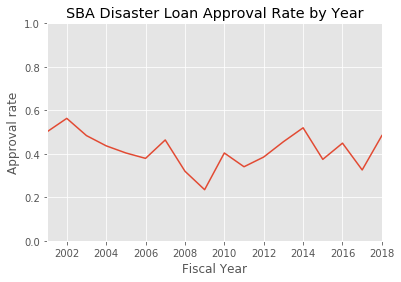

In [24]:
approval_rate_by_var("FY", output = "Line Plot")
plt.title("SBA Disaster Loan Approval Rate by Year")
plt.ylim([0,1])
plt.xlabel("Fiscal Year")
plt.ylabel("Approval rate")
plt.show()

### By State

In [25]:
states = [x.abbr for x in us.states.STATES]
states[:10]

['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL']

In [26]:
state_approval_rates = approval_rate_by_var("STATE")
state_approval_rates = state_approval_rates[states]
print(len(state_approval_rates))
state_approval_rates.sort_values(ascending = True).head(10) 

51


ID    0.268041
IL    0.294574
LA    0.343724
AL    0.355930
WI    0.373085
TX    0.381543
NC    0.386099
AR    0.386452
MS    0.394303
MI    0.398376
dtype: float64

In [27]:
state_approval_rates.sort_values(ascending = False).head(10)

ND    0.664230
NH    0.639451
MN    0.638875
DE    0.627010
MA    0.608063
WA    0.593269
HI    0.583824
WY    0.582996
CO    0.582815
UT    0.579439
dtype: float64

In [28]:
#state_approval_rates.to_csv("state_approval_rates.csv")

### By disaster

Confrim that SBA DECL has no null values

In [29]:
len(df_approvals) == df_approvals['SBA_DECL'].notnull().sum()

True

In [30]:
major_disasters = df_approvals['SBA_DECL'].value_counts().head(20).index

In [31]:
major_disaster_rates = {}
for disaster in major_disasters:
    approvals = df_approvals[df_approvals['SBA_DECL']==disaster]
    declines = df_declines[df_declines['SBA_DECL']==disaster]
    major_disaster_rates[disaster] = len(approvals) / (len(approvals) + len(declines))
pd.Series(major_disaster_rates).sort_values()

TX-00308    0.200907
TX-00066    0.301435
LA-00002    0.332479
LA-00004    0.369144
3620        0.370632
FL-00130    0.375435
3635        0.379244
MS-00005    0.390342
TX-00487    0.428681
FL-00011    0.458835
NJ-00033    0.468418
LA-00065    0.476162
3615        0.477639
3304        0.484260
3347        0.491466
NY-00130    0.497523
PR-00031    0.519956
3627        0.542028
9M49        0.556643
3320        0.654742
dtype: float64

### By type of loan

In [32]:
approval_rate_by_var("LOAN_TYPE")[['H','B']]

H    0.407479
B    0.454428
dtype: float64

## Withdrawals analysis

In [33]:
df_withdrawals['WD_CODES'].value_counts().head()

52    57687
59    53571
51    34591
56    27301
53    26696
Name: WD_CODES, dtype: int64

In [34]:
df_withdrawals['WD_CODES2'].value_counts().head()

        32897
 60W     1216
 59       871
 60A      231
 51       225
Name: WD_CODES2, dtype: int64

In [35]:
df_withdrawals_51 = df_withdrawals[(df_withdrawals['WD_CODES']=="51")|(df_withdrawals['WD_CODES2']=="51")].copy()
print(df_withdrawals_51.shape)
df_withdrawals_51.head()

(34593, 16)


,FY,SBA_PHYS_NBR,SBA_EIDL_NBR,FEMA_DECL,SBA_DECL,CITY,STATE,ZIP,COUNTY,LOAN_TYPE,TOT_ORIG_VER_LOSS,TOT_ORIG_VER_LOSS_RE,TOT_ORIG_VER_LOSS_CONTENT,WD_CODES,WD_CODES2,Unnamed: 15
0,2001,,9K98,,9K98,CHARLESTON,SC,29412,CHARLESTON,EIDL,0,0.0,0.0,51,NaN,NaN
12,2003,,9R57,,9R57,DES ALLEMANDS,LA,70030,ST. CHARLES,EIDL,0,0.0,0.0,51,NaN,NaN
21,2003,,9R57,,9R57,MONTEGUT,LA,70377,LAFOURCHE,EIDL,0,0.0,0.0,51,NaN,NaN
25,2003,,9R57,,9R57,RACELAND,LA,70394,LAFOURCHE,EIDL,0,0.0,0.0,51,NaN,NaN
33,2003,,9R57,,9R57,DULAC,LA,70353,TERREBONNE,EIDL,0,0.0,0.0,51,NaN,NaN


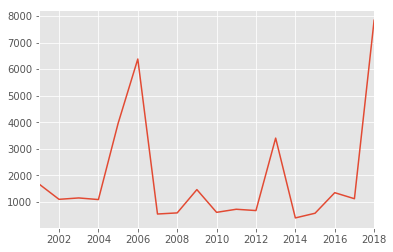

In [36]:
df_withdrawals_51['FY'].value_counts().sort_index().plot()

In [37]:
df_51_time_series = pd.DataFrame(df_withdrawals_51['FY'].value_counts().sort_index())
df_51_time_series.columns = ['Count']
#df_51_time_series.to_csv("code_51_time_series.csv")
df_51_time_series

,Count
2001,1664
2002,1096
2003,1148
2004,1087
2005,3955
2006,6379
2007,543
2008,585
2009,1462
2010,606


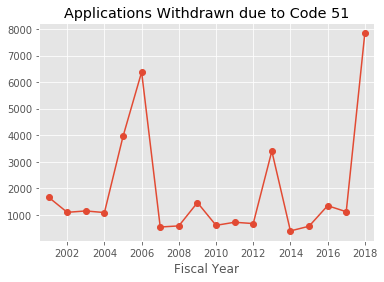

In [38]:
#df_withdrawals['FY'].value_counts().sort_index().plot()
plt.plot(df_withdrawals_51['FY'].value_counts().sort_index(), marker="o")
plt.xlim([2000.5,2018.5])
plt.title("Applications Withdrawn due to Code 51")
plt.xlabel("Fiscal Year")
plt.show()

In [39]:
df_withdrawals_51['FY'].value_counts().sort_index()

2001    1664
2002    1096
2003    1148
2004    1087
2005    3955
2006    6379
2007     543
2008     585
2009    1462
2010     606
2011     722
2012     673
2013    3401
2014     396
2015     572
2016    1346
2017    1119
2018    7839
Name: FY, dtype: int64

In [40]:
apps_by_year = df_withdrawals['FY'].value_counts().sort_index() + df_approvals['FY'].value_counts().sort_index() + df_declines['FY'].value_counts().sort_index()

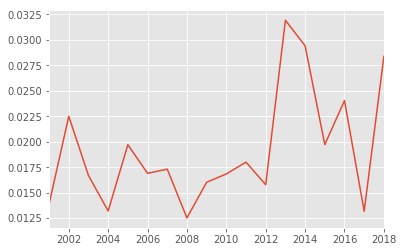

In [41]:
withdraw_51_rates_by_year = df_withdrawals_51['FY'].value_counts().sort_index() / apps_by_year
plt.style.use("ggplot")
withdraw_51_rates_by_year.plot(kind = "line")

In [42]:
df_withdrawals_51['SBA_DECL'].value_counts().head()

LA-00002    3541
PR-00031    2903
FL-00130    2422
TX-00487    1957
NY-00130    1902
Name: SBA_DECL, dtype: int64

In [43]:
df_approvals['SBA_DECL'].value_counts().head()

LA-00002    51252
TX-00487    38652
PR-00031    34562
FL-00130    33636
MS-00005    24695
Name: SBA_DECL, dtype: int64

Home vs. business 

In [44]:
df_approvals['LOAN_TYPE'].value_counts()

H    505971
B    103302
Name: LOAN_TYPE, dtype: int64

In [45]:
# Proportion of approvals which are home loans
len(df_approvals[df_approvals['LOAN_TYPE']=="H"]) / len(df_approvals)

0.8304503892343826

## Most common decline / withdrawal reasons

In [46]:
# Combine the value counts of the decline code columns into a new dataframe to calculate totals
df_decline_codes_1_2 = pd.merge(df_declines['DECL_CODES'].value_counts(),df_declines['DECL_CODES2'].value_counts(),
                                left_index = True, right_index = True, how = "outer")
df_decline_codes_1_2_3 = pd.merge(df_decline_codes_1_2, df_declines['DECL_CODES3'].value_counts(),
                                  left_index = True, right_index = True, how = "outer")
df_decline_codes = pd.merge(df_decline_codes_1_2_3, df_declines['DECL_CODES4'].value_counts(), left_index = True,
                            right_index = True, how = "outer")
df_decline_codes.fillna(value = 0, inplace = True)
df_decline_codes['Total'] = df_decline_codes.sum(axis = 1)
df_decline_codes.sort_values(by = "Total", ascending = False, inplace = True)
df_decline_codes.head(10)

,DECL_CODES,DECL_CODES2,DECL_CODES3,DECL_CODES4,Total
28,428320.0,138893.0,5854.0,95.0,573162.0
21,294858.0,33637.0,4976.0,0.0,333471.0
27,30064.0,16375.0,1039.0,1.0,47479.0
,0.0,29585.0,5270.0,699.0,35554.0
20,28764.0,1.0,0.0,0.0,28765.0
36,15909.0,2939.0,581.0,66.0,19495.0
42,9893.0,2445.0,642.0,58.0,13038.0
26,6328.0,3416.0,243.0,0.0,9987.0
38,6705.0,409.0,81.0,4.0,7199.0
44R,5234.0,1360.0,163.0,16.0,6773.0


In [47]:
# how many declines had neither of the two most common reasons listed.
neither_of_two_top_reasons = len(df_declines[(df_declines['DECL_CODES'].isin(["28","21"])==False)&
            (df_declines['DECL_CODES2'].isin(["28","21"])==False)&
            (df_declines['DECL_CODES3'].isin(["28","21"])==False)&
            (df_declines['DECL_CODES4'].isin(["28","21"])==False)])
print(neither_of_two_top_reasons)
print(len(df_declines) - neither_of_two_top_reasons)
print(1 - neither_of_two_top_reasons / len(df_declines))

86243
773517
0.8996894482181074


In [48]:
df_withdrawal_codes = pd.merge(df_withdrawals['WD_CODES'].value_counts(), df_withdrawals['WD_CODES2'].value_counts(),
                                left_index = True, right_index = True, how = "outer")
df_withdrawal_codes['Total'] = df_withdrawal_codes.sum(axis = 1)
df_withdrawal_codes.sort_values(by = "Total", ascending = False, inplace = True)
df_withdrawal_codes.head(10)

,WD_CODES,WD_CODES2,Total
52,57687.0,3.0,57690.0
59,53571.0,2.0,53573.0
51,34591.0,2.0,34593.0
,NaN,32897.0,32897.0
56,27301.0,NaN,27301.0
53,26696.0,NaN,26696.0
54,23745.0,1.0,23746.0
56A,19497.0,2.0,19499.0
55,14665.0,NaN,14665.0
56B,12013.0,1.0,12014.0


In [49]:
df_approvals['FY'].value_counts().sort_index()

2001     50636
2002     22880
2003     27062
2004     30067
2005     66415
2006    116966
2007     12442
2008     13503
2009     19518
2010     12896
2011     12131
2012     14397
2013     39452
2014      5671
2015      9396
2016     21646
2017     24639
2018    109556
Name: FY, dtype: int64

In [50]:
df_declines['FY'].value_counts().sort_index()

2001     50351
2002     17756
2003     28871
2004     38772
2005     97975
2006    191599
2007     14386
2008     28683
2009     63534
2010     19039
2011     23490
2012     22966
2013     47133
2014      5241
2015     15690
2016     26557
2017     50978
2018    116739
Name: FY, dtype: int64

## Total approved amount

In [51]:
df_approvals_amounts = df_approvals.dropna(subset = ['ORIGINAL_APPROVAL_AMOUNT'])
df_approvals_amounts['ORIGINAL_APPROVAL_AMOUNT'] = df_approvals_amounts['ORIGINAL_APPROVAL_AMOUNT'].apply(str)
df_approvals_amounts = df_approvals_amounts[df_approvals_amounts['ORIGINAL_APPROVAL_AMOUNT'].str.isnumeric()]
df_approvals_amounts['ORIGINAL_APPROVAL_AMOUNT'] = df_approvals_amounts['ORIGINAL_APPROVAL_AMOUNT'].apply(int)
df_approvals_amounts['ORIGINAL_APPROVAL_AMOUNT'].apply(int).sum()

30483525880

In [52]:
df_approvals_amounts.groupby(by = "FY")['ORIGINAL_APPROVAL_AMOUNT'].sum()

FY
2001     946035600
2002    1306076800
2003     817835000
2004     862540800
2005    2247332100
2006    8252253080
2007     723995300
2008     723269700
2009    1035887200
2010     481624900
2011     671524400
2012     655727400
2013    2460026100
2014     308048600
2015     313943700
2016    1219808100
2017    1532572700
2018    5925024400
Name: ORIGINAL_APPROVAL_AMOUNT, dtype: int64

Make a line plot of the frequency of the top 5 decline reasons over time

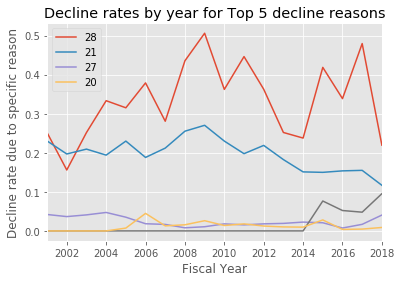

In [53]:
# Top 5 decline codes
common_decline_codes = df_decline_codes.index[:5]

# Loop through decline codes
for code in common_decline_codes:
    # Create a series containing data on how many declines there were each year for the code
    declines_by_year_for_code = pd.Series(list(map(lambda x:
            len(filter_any_code_col(code, df_declines[df_declines['FY']==x])), apps_by_year.index)),
                                        index = apps_by_year.index)
    decline_rate_by_year_for_code = declines_by_year_for_code / apps_by_year
    
    # Name the series by the decline code
    decline_rate_by_year_for_code.name = code
    decline_rate_by_year_for_code.plot()

# Configure plot
plt.title("Decline rates by year for Top 5 decline reasons")
plt.legend()
plt.ylabel("Decline rate due to specific reason")
plt.xlabel("Fiscal Year")

# Display plot
plt.show()